## Construir uma estrutura de WordEmbeddings do zero

A estrutura de Word Embeddings é muito atrelada ao contexto. Por vezes, é preciso criar uma estrutura com base no corpus que está sendo utilizado.

### Inicialmente será criado um modelo baseado no Word2vec

Para simplificação, será considearado um corpus com 6 sentenças. Extraídas do dataset que possui avaliações de clientes das lojas americanas.

In [ ]:
import pandas as pd

df_full = pd.read_csv('https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/americanas_analise_sentimento_preparado.csv')

In [ ]:
df_full.head()

,review_text,sentiment
0,"A entrega foi no prazo, as americanas estão de...",positive
1,"Excelente produto, por fora em material acríli...",positive
2,"produto mto bom, com essa garrafinha vc pode a...",positive
3,O barulho e minimo e o vento é bem forte na ve...,positive
4,MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ES...,negative


In [ ]:
positivos = df_full[df_full.sentiment=='positive'].sample(3)
negativos = df_full[df_full.sentiment=='negative'].sample(3)
sample = pd.concat([positivos, negativos], ignore_index=True )

In [ ]:
sample.review_text.values

array(['Produto de excelente qualidade.  Mochila possui bastante espaço interno para outros apetrechos além do notebook. Super confortável e prática.  Recomendo para quem necessita de uma mochila para acompanhar na dia dia  na rotina trabalho, faculdade e viagens.',
       'Uma pipoqueira ótima... principalmente por não usar óleo. Pipocas saudáveis.',
       'Acertei na escolha do Computador. Excelente (funcionalmente e esteticamente).',
       'Na primeira semana que comecei a usar a faixa amarela quebrou, depois a vermelha também quebrou e quase me machuquei.',
       'Não gostei do produto. Comprei dois notebooks dessa marca e os dois vieram com defeito.',
       'A tv digital é ruim..não pega muitos canais e falha bastante. Não tem 8GB e nem 1G de RAM como descrito, mas na verdade uns 15% menos em cada. Sempre trava apos algumas hora de uso, principalmente pesquisas no google. Vc precisa resetar com uma agulha no furinho. Bateria acaba em menos de 2h de uso continuo...tem que estar

In [ ]:
sentences = ['gostaria de saber se é a versão global pois tenho medo de não vir',
             'Funciona perfeitamente e atende a todas as necessidades que se \
             propõe atender Apenas senti falta do pente para aparar sobrancelhas\
              que nos modelos anteriores a Phillips incluía no pacote',
             'Excelente produto imagem e som melhor que cinema sistema \
             operacional nota 10',
             'Estou tentando contado com a americanas.com desde quinta\
             e sem sucesso O produto veio errado E NÃO EXISTE SUPORTE DA \
             AMERICANAS Por favor fico no aguardo de como proceder \
             Pois veio uma máquina que custa a metade do valor que paguei pelo \
             site de vocês',
             'Ele não atende as expectativas porque ele é muito pequeno e não \
             tem como fazer nada com ele ele simplesmente É para decoração e se \
             você quer um para usar eu não recomendo',
             'Produto ruim e com fone de ouvido defeituoso Celular trava muito \
             e a resolução e muito ruim']

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Tokenizando de forma básica os documentos, visto que já tinha sido extraída a pontuação
sentences = [sentence.lower().split() for sentence in sentences]

In [ ]:
sentences

Os principais parâmetros a serem considerados para a criação do modelo são:
* size: número de dimensões do vetor de palavras que será gerado. O valor padrão é 100.
* window: vai definir quantas palavras deverão ser consideradas na janela deslizante para o treinamento do modelo. Valor padrão é 5.
* min_count: especifica a quantidade mínima de ocorrência para uma palavra constar no vocabulário. Valor padrão é 5.
* sg: especifica o algoritmo de treinamento do modelo (0: cbow ou 1:skipgram). Valor padrão é 0.

Mais informações sobre esses parâmetros podem ser encontrados em: 
https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
# Para criar o modelo
model = Word2Vec(sentences, min_count=1)

In [ ]:
len(model.wv.vocab)

102

In [ ]:
model.vector_size

100

In [ ]:
model.wv['produto']

array([ 2.6659518e-03,  5.7488243e-04, -5.0000413e-03, -1.8931123e-03,
       -2.2027632e-03, -1.9086477e-03,  5.1313202e-04, -4.5010667e-05,
       -1.3831886e-03, -8.4272784e-04,  1.9744979e-03, -4.7714124e-04,
       -4.8819203e-03, -7.9784653e-04,  1.0882116e-04, -3.0866666e-03,
        1.4730801e-03, -1.7365353e-03, -3.1049794e-03, -2.3536808e-03,
       -3.5974267e-04,  1.8394991e-03,  2.4766896e-03,  4.1644685e-03,
       -4.9301302e-03, -4.8387777e-03,  3.3862218e-03,  3.4196503e-03,
        1.8945774e-03, -2.9211408e-03, -2.3200836e-03,  3.1014646e-03,
       -2.5730326e-03,  9.6656429e-04, -1.3671041e-04, -3.7413382e-03,
       -2.1524795e-03, -7.4197201e-04,  4.8685609e-03,  1.5852753e-03,
        3.9599026e-03,  7.4045424e-04, -4.4517103e-03,  2.2838300e-03,
       -3.9495085e-03, -2.7671892e-03, -4.2169942e-03,  1.3607335e-03,
       -1.8275739e-03, -1.0936292e-03,  1.1294544e-03, -1.9008457e-03,
        4.6420242e-03, -3.3118695e-03,  4.2493325e-03, -3.1079599e-03,
      

In [ ]:
# Tamanho do de cada vetor de palavra
model.vector_size

6

In [ ]:
# Tamanho do vocabulário
len(model.wv.vocab)

102

In [ ]:
model.most_similar('produto')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fico', 0.8504351377487183),
 ('porque', 0.8185396790504456),
 ('som', 0.7877445220947266),
 ('errado', 0.7779865264892578),
 ('todas', 0.7635154724121094),
 ('aparar', 0.6602810621261597),
 ('um', 0.640475869178772),
 ('ele', 0.5797092914581299),
 ('eu', 0.5713419914245605),
 ('valor', 0.5457600355148315)]

In [ ]:
# Restringindo o vocabulário
model_2 = Word2Vec(sentences, min_count=2)

In [ ]:
len(model_2.wv.vocab)

20

In [ ]:
model_2.wv['produto']

array([ 2.6465307e-03,  5.4401770e-04, -4.9950890e-03, -1.9223088e-03,
       -2.2034610e-03, -1.9123408e-03,  5.1857316e-04, -4.3174208e-05,
       -1.3936728e-03, -8.6139818e-04,  1.9764439e-03, -4.8317428e-04,
       -4.8786718e-03, -7.9168472e-04,  1.0381565e-04, -3.0805117e-03,
        1.4500396e-03, -1.7616214e-03, -3.1084686e-03, -2.3595253e-03,
       -3.5104217e-04,  1.8271344e-03,  2.4661091e-03,  4.1820030e-03,
       -4.9348655e-03, -4.8395745e-03,  3.3784965e-03,  3.4207990e-03,
        1.8983670e-03, -2.9180422e-03, -2.3343973e-03,  3.0888673e-03,
       -2.5878027e-03,  9.5180259e-04, -1.5038530e-04, -3.7655318e-03,
       -2.1483018e-03, -7.2266033e-04,  4.8645022e-03,  1.5636664e-03,
        3.9650942e-03,  7.6490932e-04, -4.4498262e-03,  2.2981714e-03,
       -3.9367625e-03, -2.7669019e-03, -4.2114356e-03,  1.3535407e-03,
       -1.8192488e-03, -1.0953258e-03,  1.1224824e-03, -1.9052001e-03,
        4.6514855e-03, -3.2992153e-03,  4.2276923e-03, -3.0990953e-03,
      

In [ ]:
model_2.most_similar('produto')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('no', 0.13375720381736755),
 ('com', 0.08469712734222412),
 ('para', 0.08175693452358246),
 ('muito', 0.0773085206747055),
 ('pois', 0.03696203976869583),
 ('as', 0.03651314228773117),
 ('ruim', 0.007720813155174255),
 ('do', 0.005487322807312012),
 ('não', -0.015267781913280487),
 ('atende', -0.03577832132577896)]

In [ ]:
# Para salvar o modelo
model.save('model.bin')

In [ ]:
# Para carregar um modelo previamente salvo
model_loaded=Word2Vec.load('/content/model.bin')

In [ ]:
model_loaded.vector_size

100

## Visualizar a relação entre as palavras do modelo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


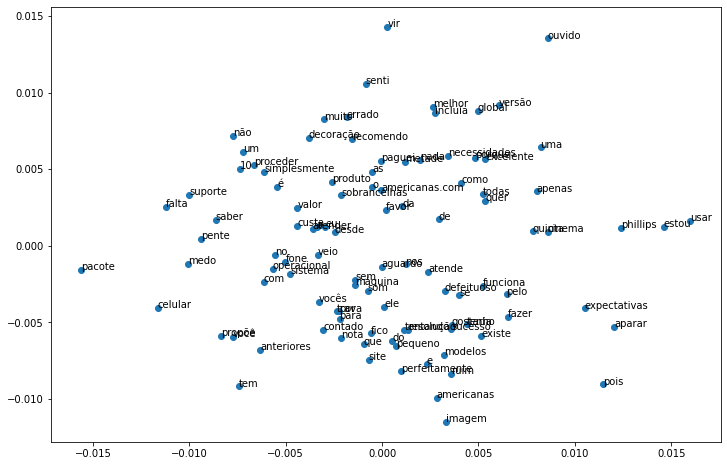

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,8))
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
model.most_similar('celular')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tem', 0.2475150227546692),
 ('desde', 0.219632089138031),
 ('falta', 0.19055652618408203),
 ('10', 0.1803598254919052),
 ('favor', 0.17984558641910553),
 ('pacote', 0.16987624764442444),
 ('não', 0.13616140186786652),
 ('você', 0.12392181903123856),
 ('apenas', 0.12112196534872055),
 ('pente', 0.11449839919805527)]

## Exercício
Ampliar a análise para 200 registros.

In [ ]:
!spacy download pt_core_news_sm -q

2022-10-22 00:08:35.168516: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 13.0 MB 16.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
import spacy

nlp = spacy.load('pt_core_news_sm')

In [ ]:
def sentence_tokenizer(sentence):
  return [token.lemma_ for token in nlp(sentence.lower()) 
              if (token.is_alpha & ~token.is_stop)]

In [ ]:
sample_sentences = df_full.review_text.sample(200)

In [ ]:
tokenized_sentences = [sentence_tokenizer(sentence) for sentence in sample_sentences.values 
                       if pd.notnull(sentence)]

In [ ]:
len(tokenized_sentences)

191

In [ ]:
model = Word2Vec(tokenized_sentences, min_count=1, size=50)

In [ ]:
model.most_similar('compre')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('celular', 0.4538019299507141),
 ('tirar', 0.4149642884731293),
 ('pegado', 0.3952488303184509),
 ('relíquia', 0.3899158239364624),
 ('japone', 0.38812384009361267),
 ('próprio', 0.3743058145046234),
 ('imaginação', 0.36459776759147644),
 ('cinto', 0.36448195576667786),
 ('humano', 0.3557368218898773),
 ('jeito', 0.35500267148017883)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


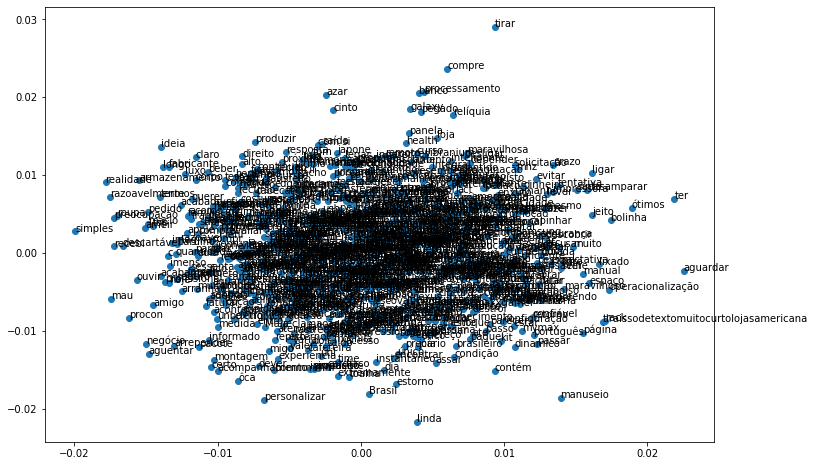

In [ ]:
plt.subplots(figsize=(12,8))
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Para classificar um texto??

Para utilizar essa estrutura para representar um texto, temos 2 abordagens:

* utilizar a média dos valores do array de cada palavra da sentença;
* utilizar a média ponderando com o fator tfidf.

Uma outra opção é utilizar o algoritmo Doc2Vec, que se mostra muito mais prático.


### Utilizando o Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
sample

,review_text,sentiment
0,"O quadro é muito lindo! Ótimo produto, sofisti...",positive
1,eu fiquei muito satisfeito muito bom mesmo opr...,positive
2,Excelente acamento. Muito funcional e prático....,positive
3,"Estética bonita, porém não passa de um ventila...",negative
4,Demora para entregar e ainda teve um adiamento...,negative
5,Comprei o produto que é vendido pela Best Plus...,negative


In [ ]:
tokenized_sentences = [sentence_tokenizer(sentence) for sentence in sample.review_text.values 
                       if pd.notnull(sentence)]

In [ ]:
# Corpus de treinamento
tokenized_sentences

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in \
enumerate(tokenized_sentences)]
documents

[TaggedDocument(words=['quadro', 'lir', 'bom', 'produto', 'sofisticar', 'brilhoso', 'esposo', 'amar', 'entregar', 'prazo', 'recomendo'], tags=[0]),
 TaggedDocument(words=['fiquei', 'satisfeito', 'oproduto', 'eficiente', 'bonito', 'hora'], tags=[1]),
 TaggedDocument(words=['excelente', 'acamento', 'funcional', 'prático', 'nao', 'preciso', 'ficar', 'estribo', 'fixo', 'carro', 'permanete', 'nenhum', 'combina', 'desenho', 'carro', 'problema', 'resolver', 'so', 'aparecer', 'abrir', 'porta', 'recomendo'], tags=[2]),
 TaggedDocument(words=['estético', 'bonito', 'passar', 'ventilador', 'fraco', 'barulho', 'aumentar', 'ventilação', 'alto', 'opção', 'umidificar', 'colocar', 'gelo', 'sinceramente', 'resfr', 'ambiente', 'optar', 'ventilador', 'barato', 'silencioso', 'eficiência', 'térmico'], tags=[3]),
 TaggedDocument(words=['demor', 'entregar', 'adiamento', 'móvel', 'fazer', 'mdp', 'molhar', 'perder', 'manual', 'claro', 'montagem', 'dificil', 'esteticamente', 'falar', 'agradável', 'expectativa', 

In [ ]:
model = Doc2Vec(documents, vector_size=20, min_count=1)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.vector_size

20

In [ ]:
len(model.docvecs)

6

In [ ]:
model.docvecs[0]

array([ 8.6518852e-03,  1.6626693e-02,  7.2742067e-03,  1.9330801e-02,
       -6.7653130e-03,  2.0176686e-02,  8.1580803e-03,  1.6668035e-02,
       -1.8136876e-02,  2.1903429e-02,  1.4327213e-02, -1.2857548e-02,
       -5.2086678e-03,  8.1906877e-03, -2.1284018e-02,  1.5894845e-02,
        1.5172896e-03,  6.3034152e-03,  5.4279764e-05,  1.5262879e-02],
      dtype=float32)

In [ ]:
list(model.docvecs[0])

[0.008651885,
 0.016626693,
 0.0072742067,
 0.019330801,
 -0.006765313,
 0.020176686,
 0.00815808,
 0.016668035,
 -0.018136876,
 0.02190343,
 0.014327213,
 -0.012857548,
 -0.005208668,
 0.008190688,
 -0.021284018,
 0.015894845,
 0.0015172896,
 0.006303415,
 5.4279764e-05,
 0.015262879]

Pronto!! Temos o nosso corpus vetorizado. Agora é partir para os algoritmos de ML.

In [ ]:
text_representation = [list(model.docvecs[i]) for i in  range(0, len(model.docvecs))]

In [ ]:
text_representation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(text_representation, sample.sentiment)

RandomForestClassifier()

In [ ]:
rf.predict([text_representation[0]])

array(['positive'], dtype=object)

In [ ]:
# Para acrescentar mais um documento ao modelo
novo_array = ['não', 'gostei', 'do', 'produto']
vector = model.infer_vector(novo_array)
print(vector)

[-8.9525878e-03 -3.1399571e-03  6.7752716e-03 -3.6599125e-05
 -1.0533672e-02  7.9165166e-03 -7.3657342e-04  1.9286474e-02
  2.3775071e-02  8.2192812e-03  5.7409764e-03  7.7604922e-03
 -7.4479021e-03  8.7947845e-03 -1.0846049e-02  2.1399405e-02
  2.3364019e-02  6.7389496e-03  2.7125846e-03 -2.3436313e-02]


In [ ]:
model.most_similar('bom')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('devolução', 0.457511305809021),
 ('alto', 0.44842517375946045),
 ('móvel', 0.4370281994342804),
 ('hora', 0.43290460109710693),
 ('ser', 0.3952295184135437),
 ('utilizei', 0.386854350566864),
 ('dificil', 0.38601648807525635),
 ('quadro', 0.3713579475879669),
 ('real', 0.3520694673061371),
 ('entregar', 0.29712116718292236)]

In [ ]:
texto_teste = 'Achei o produto muito dificil!!'
rf.predict([list(model.infer_vector(sentence_tokenizer(texto_teste)))])

array(['positive'], dtype=object)

## Utilizando a média dos valores do Word2Vec

$$AWV(D) = \frac{\sum^{n}_{1}\,wv(w)}{n}$$

In [ ]:
# criar um outro modelo com menos dimensões

model = Word2Vec(sentences, min_count=1, size=5)

In [ ]:
import numpy as np

def average_word_vectors(words, model):
  feature_vector = np.zeros((model.vector_size,),dtype="float64")
  nwords = 0
  for word in words:
    if word in model.wv.vocab:
      nwords = nwords + 1
      feature_vector = np.add(feature_vector, model[word])
  if nwords:
    feature_vector = np.divide(feature_vector, nwords)
  return feature_vector

# generalize above function for a corpus of documents
def averaged_word_vectorizer(corpus, model):
  features = [average_word_vectors(tokenized_sentence, model) for 
              tokenized_sentence in corpus]
  return np.array(features)

In [ ]:
avg_word_vec_features = averaged_word_vectorizer(corpus=sentences, model=model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
# As sentenças foram transformadas em cada vetor abaixo
avg_word_vec_features

array([[-0.01066814, -0.00416092, -0.00487065,  0.01734239, -0.0053735 ],
       [-0.00927088, -0.01375968,  0.00607418, -0.00427566, -0.00195792],
       [ 0.01999616, -0.00715604, -0.00349137, -0.00657714, -0.0375433 ],
       [ 0.01268658, -0.01861571, -0.00174476,  0.0066288 ,  0.01009676],
       [-0.00702122, -0.0126913 , -0.02381504, -0.00866629, -0.00265285],
       [-0.01236211, -0.02486421, -0.01878953, -0.02397159, -0.02152416]])

#### Utilizando o TFIDF

$$ TWA(D) = \frac{\sum^{n}_{1}\,wv(w) \times tfidf(w)}{n}$$

In [ ]:
sentences_to_tfidf = [' '.join(sentence) for sentence in sentences]

In [ ]:
sentences_to_tfidf

['gostaria de saber se é a versão global pois tenho medo de não vir',
 'funciona perfeitamente e atende a todas as necessidades que se propõe atender apenas senti falta do pente para aparar sobrancelhas que nos modelos anteriores a phillips incluía no pacote',
 'excelente produto imagem e som melhor que cinema sistema operacional nota 10',
 'estou tentando contado com a americanas.com desde quinta e sem sucesso o produto veio errado e não existe suporte da americanas por favor fico no aguardo de como proceder pois veio uma máquina que custa a metade do valor que paguei pelo site de vocês',
 'ele não atende as expectativas porque ele é muito pequeno e não tem como fazer nada com ele ele simplesmente é para decoração e se você quer um para usar eu não recomendo',
 'produto ruim e com fone de ouvido defeituoso celular trava muito e a resolução e muito ruim']

In [ ]:
# Primeiro passo, obter a matriz TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences_to_tfidf)
tfidf_vocabulary = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
'produto' in tfidf_vocabulary

True

In [ ]:
tfidf_matrix[0].toarray()[0,64]

0.0

In [ ]:
tfidf_matrix.shape

(6, 97)

In [ ]:
tfidf_vocabulary[9]

'celular'

In [ ]:
def tfidf_wtd_avg_word_vectors(words, tfidf_vector, tfidf_vocabulary, model):
  word_tfidfs = [tfidf_vector[0, tfidf_vocabulary.index(word)] 
                 if word in tfidf_vocabulary else 0 for word in words]
  word_tfidf_map = {word:tfidf_val for word, tfidf_val in 
                    zip(words, word_tfidfs)}
  feature_vector = np.zeros((model.vector_size,),dtype="float64")
  vocabulary = set(model.wv.vocab)
  wts = 0.
  for word in words:
    if word in vocabulary:
      word_vector = model[word]
      weighted_word_vector = word_tfidf_map[word] * word_vector
      wts = wts + word_tfidf_map[word]
      feature_vector = np.add(feature_vector, weighted_word_vector)
  if wts:
    feature_vector = np.divide(feature_vector, wts)
  return feature_vector


def tfidf_weighted_averaged_word_vectorizer(corpus, tfidf_vectors, 
                                            tfidf_vocabulary, model):
  docs_tfidfs = [(doc, doc_tfidf) for doc, doc_tfidf in zip(
      corpus, tfidf_vectors)]
  features = [tfidf_wtd_avg_word_vectors(tokenized_sentence, tfidf.toarray(), 
                                         tfidf_vocabulary, model) for 
              tokenized_sentence, tfidf in docs_tfidfs]
  return np.array(features)

In [ ]:
result = tfidf_weighted_averaged_word_vectorizer(corpus=sentences, 
                                        tfidf_vectors=tfidf_matrix, 
                                        tfidf_vocabulary=tfidf_vocabulary,
                                        model=model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


# Exercício:
Implementar o modelo de classificação usando Doc2Vec no dataset de notícias da folha, trabalhado na aula passada. 